In [13]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# DEBUG_MODE=True

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.6 from "C:\Users\Sharon\anaconda3\envs\PythonData\python.exe"
  * The NumPy version is: "1.18.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed: The specified module could not be found.


In [9]:
business_df=pd.read_csv("Resources/yelp_atl_restaurants_csv.csv")
if DEBUG_MODE==True:
    business_df=business_df[:1000]
business_df.head(2)

NameError: name 'pd' is not defined

In [ ]:
business_df.to_csv("yelp_business_test.csv")

In [ ]:
atl_restaurants_df = business_df.drop(['Unnamed: 0'], axis=1)
atl_restaurants_df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,z8-_6l5EhX5NuPfWzJYQMA,Great Wraps,3393 Peachtree Rd NE,Atlanta,GA,30326,33.846335,-84.363578,3.0,11,1,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...","Food, Restaurants, Cheesesteaks, Sandwiches, J...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ..."
1,Q2vefh0tGhtCGQDK1FI7cw,Piece of Cake,3215 Roswell Rd NE,Atlanta,GA,30305,33.842875,-84.378539,4.0,231,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Restaurants, Patisserie/Cake Shop, Desserts, F...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-17:0', ..."


In [ ]:
atl_restaurants_df.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code       int64
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [ ]:
atl_restaurants_df.describe()

,postal_code,latitude,longitude,stars,review_count,is_open
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,30287.588000,33.820359,-84.337285,3.52300,146.164000,0.608000
std,89.901505,0.054243,0.046624,0.72041,256.372288,0.488441
min,30002.000000,33.685215,-84.396438,1.00000,5.000000,0.000000
25%,30306.000000,33.774780,-84.373898,3.00000,20.000000,0.000000
50%,30312.000000,33.817587,-84.352818,3.50000,63.000000,1.000000
75%,30329.000000,33.852920,-84.304802,4.00000,174.000000,1.000000
max,30360.000000,33.949014,-84.200247,5.00000,3825.000000,1.000000


In [ ]:
print("The average review is ", atl_restaurants_df['stars'].mean(), " stars.")
print("The average review count is ", atl_restaurants_df['review_count'].mean(), ".")

The average review is  3.523  stars.
The average review count is  146.164 .


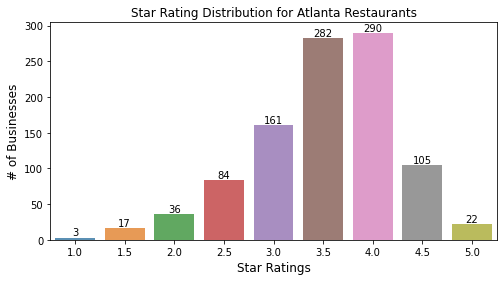

In [ ]:
# Get the distribution of the ratings
x=atl_restaurants_df['stars'].value_counts()
x=x.sort_index()

#plot
plt.figure(figsize=(8,4))
ax=sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution for Atlanta Restaurants")
plt.ylabel('# of Businesses', fontsize=12)
plt.xlabel('Star Ratings', fontsize=12)

#adding the text labels
rects=ax.patches
labels=x.values 
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va= 'bottom')

plt.show()


In [ ]:
rest_stars_df=pd.read_csv("static/Resources/categories.csv")
rest_stars_df

NameError: name 'pd' is not defined

In [ ]:
# List the categories in descending order
atl_restaurants_df.groupby('categories').size().sort_values(ascending=False)

categories
Restaurants, Pizza                                                              14
Mexican, Restaurants                                                            13
Restaurants, Mexican                                                            11
Chinese, Restaurants                                                            11
Pizza, Restaurants                                                               9
                                                                                ..
Restaurants, Bars, Sports Bars, American (Traditional), Nightlife                1
Restaurants, Bars, Seafood, Nightlife, American (New), Cocktail Bars, Diners     1
Restaurants, Bars, Sandwiches, Nightlife, Pizza                                  1
Restaurants, Bars, Pubs, Nightlife, American (New), Burgers, Gastropubs          1
Active Life, Ethiopian, Amateur Sports Teams, Restaurants                        1
Length: 834, dtype: int64

## Visualize the Top Categories 

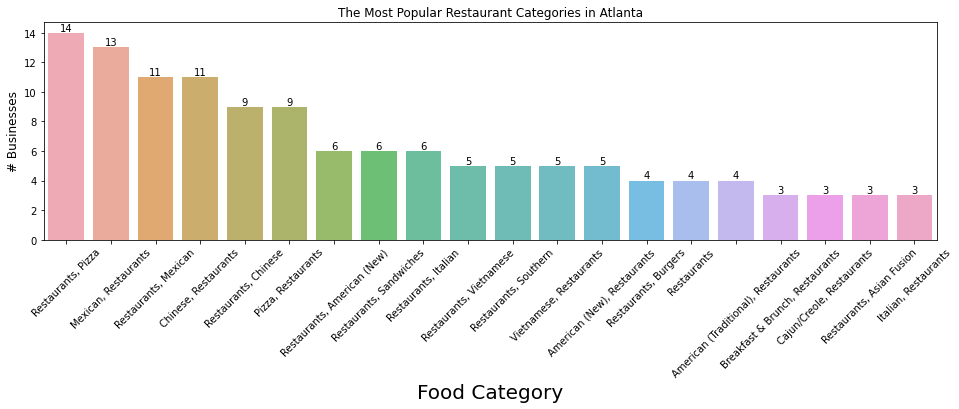

In [ ]:
# Creating x value of the column categories and inclusde counts for y value
x=atl_restaurants_df['categories'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax=sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("The Most Popular Restaurant Categories in Atlanta")
locs, labels =plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel("# Businesses", fontsize =12)
plt.xlabel("Food Category", fontsize=20)

# adding the text labels
rects = ax.patches
labels=x.values
for rect, label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va="bottom")
plt.show()